<a href="https://colab.research.google.com/github/dekilhaden/dekey/blob/main/DBSCAN_PCA_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
data = pd.read_csv('data.csv')

In [21]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [24]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [25]:
# Select only numeric columns for imputation
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [26]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features for scaling
numeric_features = data.select_dtypes(include=['number']).columns
numeric_data = data[numeric_features]

# Apply StandardScaler to numeric features only
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# If you need to combine scaled data with original data
# Create a new DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features, index=data.index)
# Concatenate the scaled numeric features with the original non-numeric features
final_data = pd.concat([data.drop(columns=numeric_features), scaled_df], axis=1)

In [27]:
#PCA to reduce the dimensionality of the scaled_data to two components.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')

Explained Variance Ratio: [0.44663031 0.32784985]


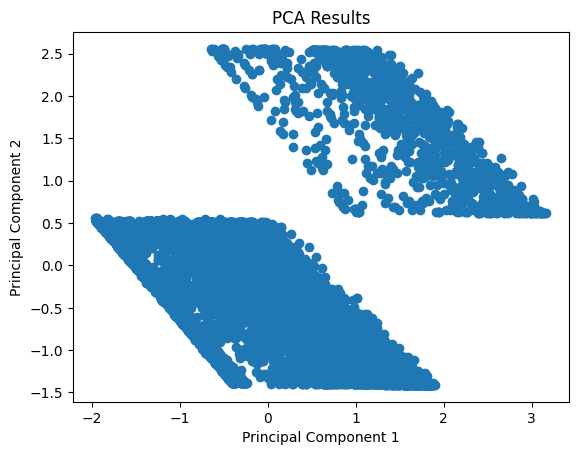

In [28]:
#Scatter plot of the first two principal components from PCA, with labeled axes and a title.
import matplotlib.pyplot as plt
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

In [29]:
#DBSCAN clustering on PCA-reduced data, with eps=0.5 and min_samples=5, and assigns cluster labels to the data points.
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(pca_data)

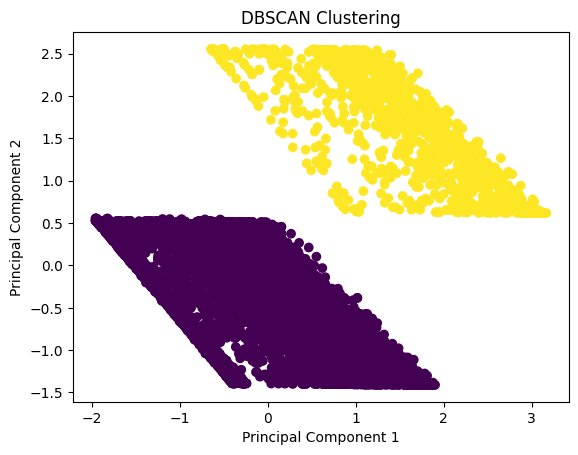

In [30]:
#Scatter plot of PCA-reduced data, coloring points based on DBSCAN clustering labels with the 'viridis' colormap, and adds axis labels and a title.
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.show()

In [31]:
#Counting the number of clusters (excluding noise) and noise points from DBSCAN results
import numpy as np
print(f'Number of clusters: {len(set(labels)) - (1 if -1 in labels else 0)}')
print(f'Number of noise points: {np.sum(labels == -1)}')

Number of clusters: 2
Number of noise points: 0


In [32]:
# Assigning Clusters to Data
data['Cluster'] = labels

In [34]:
# Select only numeric columns for cluster analysis
numeric_cols = data.select_dtypes(include=['number']).columns
cluster_analysis = data.groupby('Cluster')[numeric_cols].mean()
print(cluster_analysis)

         SeniorCitizen     tenure  MonthlyCharges  Cluster
Cluster                                                   
0                  0.0  32.192171       61.847441      0.0
1                  1.0  33.295972       79.820359      1.0


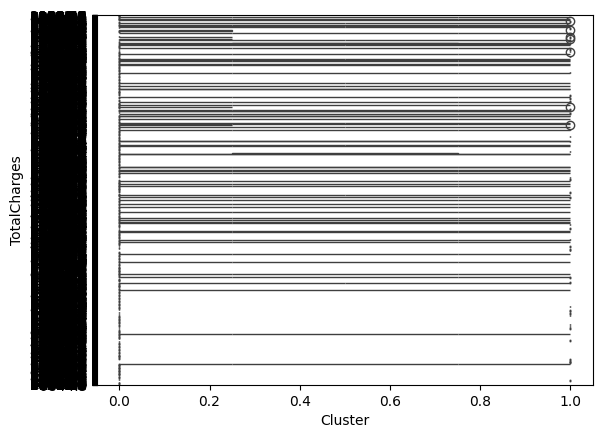

In [37]:
import seaborn as sns
# Replace 'actual_feature_name' with the actual column name from the data
# For example, if you want to visualize the 'TotalCharges' column:
sns.boxplot(x='Cluster', y='TotalCharges', data=data)  # Changed 'actual_feature_name' to 'TotalCharges'
plt.show()